In [1]:
!pip install face_alignment

# **Packages**

In [2]:
import face_alignment
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


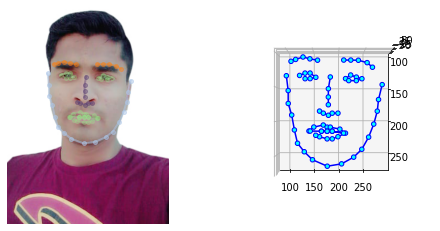

In [3]:
import face_alignment
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import io
import collections


# Optionally set detector and some additional detector parameters
face_detector = 'sfd'
face_detector_kwargs = {
    "filter_threshold" : 0.8
}

# Run the 3D face alignment on a test image, without CUDA.
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, device='cpu', flip_input=True,
                                  face_detector=face_detector, face_detector_kwargs=face_detector_kwargs)

try:
    input_img = io.imread('/content/drive/MyDrive/usama.jpg')
except FileNotFoundError:
    input_img = io.imread('/content/drive/MyDrive/usama.jpg')

preds = fa.get_landmarks(input_img)[-1]

# 2D-Plot
plot_style = dict(marker='o',
                  markersize=4,
                  linestyle='-',
                  lw=2)

pred_type = collections.namedtuple('prediction_type', ['slice', 'color'])
pred_types = {'face': pred_type(slice(0, 17), (0.682, 0.780, 0.909, 0.5)),
              'eyebrow1': pred_type(slice(17, 22), (1.0, 0.498, 0.055, 0.4)),
              'eyebrow2': pred_type(slice(22, 27), (1.0, 0.498, 0.055, 0.4)),
              'nose': pred_type(slice(27, 31), (0.345, 0.239, 0.443, 0.4)),
              'nostril': pred_type(slice(31, 36), (0.345, 0.239, 0.443, 0.4)),
              'eye1': pred_type(slice(36, 42), (0.596, 0.875, 0.541, 0.3)),
              'eye2': pred_type(slice(42, 48), (0.596, 0.875, 0.541, 0.3)),
              'lips': pred_type(slice(48, 60), (0.596, 0.875, 0.541, 0.3)),
              'teeth': pred_type(slice(60, 68), (0.596, 0.875, 0.541, 0.4))
              }

fig = plt.figure(figsize=plt.figaspect(.5))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(input_img)

for pred_type in pred_types.values():
    ax.plot(preds[pred_type.slice, 0],
            preds[pred_type.slice, 1],
            color=pred_type.color, **plot_style)

ax.axis('off')

# 3D-Plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.scatter(preds[:, 0] * 1.2,
                  preds[:, 1],
                  preds[:, 2],
                  c='cyan',
                  alpha=1.0,
                  edgecolor='b')

for pred_type in pred_types.values():
    ax.plot3D(preds[pred_type.slice, 0] * 1.2,
              preds[pred_type.slice, 1],
              preds[pred_type.slice, 2], color='blue')

ax.view_init(elev=90., azim=90.)
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()